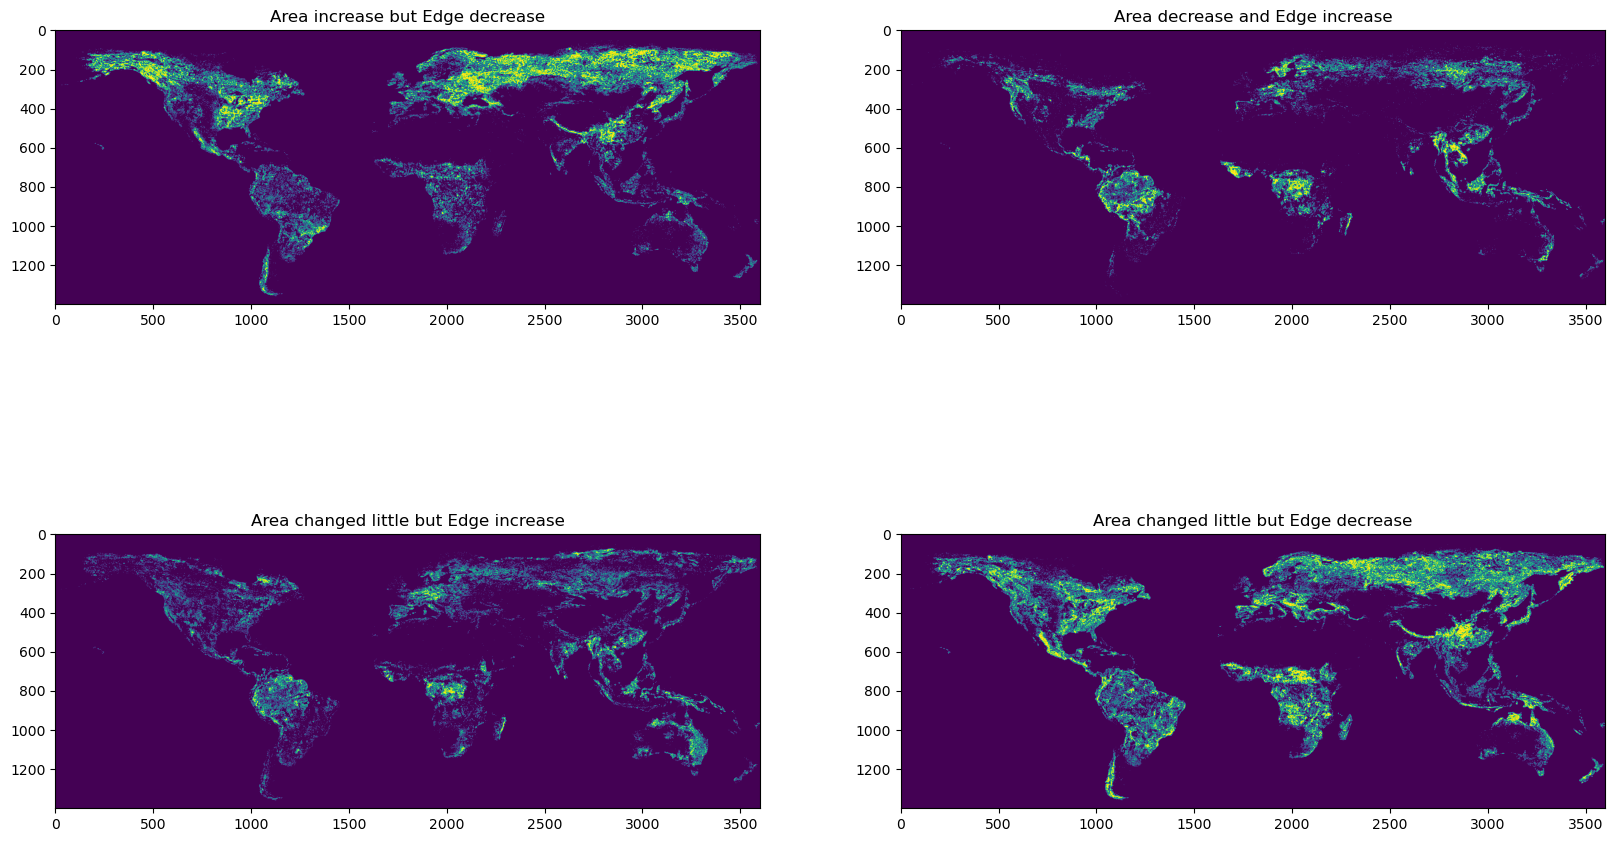

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\TIFoutput\01\whole map"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
cond1 = np.logical_and(area_diff > 0, edge_diff < 0)  # forest area增加且forest edge减少
cond2 = np.logical_and(area_diff < 0, edge_diff > 0)  # forest area减少且forest edge增加
cond3 = np.logical_and(np.abs(area_diff) < 0.05*area_2000, edge_diff > 0)  # forest area没怎么变，但是edge增加了
cond4 = np.logical_and(np.abs(area_diff) < 0.05*area_2000, edge_diff < 0)  # forest area没怎么变，但是edge减少了

# 找到满足条件的地方，赋值为True
result1 = np.where(cond1, True, False)
result2 = np.where(cond2, True, False)
result3 = np.where(cond3, True, False)
result4 = np.where(cond4, True, False)

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# 绘制图像
axs[0,0].imshow(result1)
axs[0,0].set_title('Area increase but Edge decrease')

axs[0,1].imshow(result2)
axs[0,1].set_title('Area decrease and Edge increase')

axs[1,0].imshow(result3)
axs[1,0].set_title('Area changed little but Edge increase')

axs[1,1].imshow(result4)
axs[1,1].set_title('Area changed little but Edge decrease')
# 展示图像
plt.show()


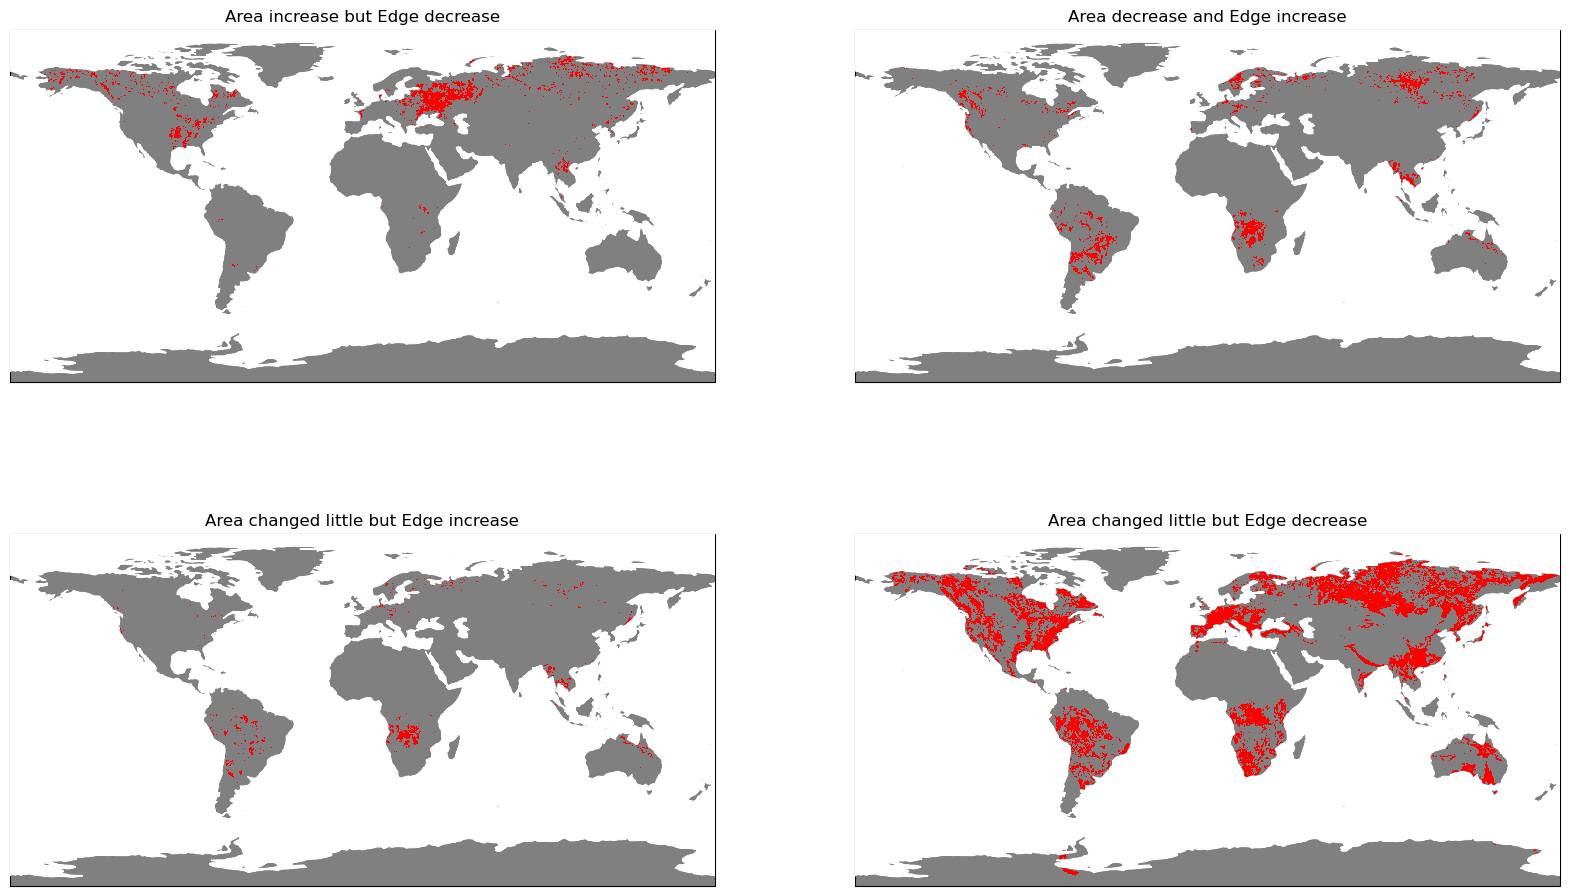

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\TIFoutput\01\whole map"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
cond1 = np.logical_and(area_diff > 0.05*area_2000, edge_diff < 0.05*edge_2000)  # forest area增加且forest edge减少
cond2 = np.logical_and(area_diff < 0.05*area_2000, edge_diff > 0.05*edge_2000)  # forest area减少且forest edge增加
cond3 = np.logical_and(np.abs(area_diff) < 0.05*area_2000, edge_diff > 0.05*edge_2000)  # forest area没怎么变，但是edge增加了
cond4 = np.logical_and(np.abs(area_diff) < 0.05*area_2000, edge_diff < 0.05*edge_2000)  # forest area没怎么变，但是edge减少了
forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)

# 找到满足条件的地方，赋值为True
result1 = np.where(cond1, True, False)
result2 = np.where(cond2, True, False)
result3 = np.where(cond3, True, False)
result4 = np.where(cond4, True, False)

# 设置投影
projection = ccrs.PlateCarree()

from matplotlib.colors import ListedColormap

# 创建一个从红色到蓝色的渐变 colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red"], N=2
)

# 将结果矩阵转换为整数，用于 colormap
result1_int = result1.astype(int)
result2_int = result2.astype(int)
result3_int = result3.astype(int)
result4_int = result4.astype(int)

fig, axs = plt.subplots(2, 2, figsize=(20, 12), subplot_kw={'projection': projection})

# 绘制图像
for ax, result, title in zip(axs.ravel(), [result1_int, result2_int, result3_int, result4_int], 
                             ['Area increase but Edge decrease', 
                              'Area decrease and Edge increase', 
                              'Area changed little but Edge increase',
                              'Area changed little but Edge decrease']):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])  # 假设数据的范围是全球
    ax.add_feature(cfeature.OCEAN, zorder=100, color='white')  # 使用白色覆盖海洋
    ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
    ax.set_title(title)

plt.show()

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\TIFoutput\01\whole map"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
thresh = 0.05  # 可以调整此阈值以控制"变化不大"的含义
cond_area_inc = area_diff > thresh*area_2000  # area增加
cond_area_dec = area_diff < -thresh*area_2000  # area减少
cond_area_stable = np.abs(area_diff) <= thresh*area_2000  # area变化不大
cond_edge_inc = edge_diff > thresh*edge_2000  # edge增加
cond_edge_dec = edge_diff < -thresh*edge_2000  # edge减少
cond_edge_stable = np.abs(edge_diff) <= thresh*edge_2000  # edge变化不大

forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)
non_forest_mask = np.where(np.isnan(forest_mask), 2, 0)

results = []
titles = []
# 九种情况
for cond_area in [cond_area_inc, cond_area_stable, cond_area_dec]:
    for cond_edge in [cond_edge_inc, cond_edge_stable, cond_edge_dec]:
        result = np.where(np.logical_and(cond_area, cond_edge), 1, 0)
        result = result * forest_mask
        result = np.nan_to_num(result) + non_forest_mask
        results.append(result)
        titles.append("Area: {}, Edge: {}".format(
            "Increase" if cond_area is cond_area_inc else ("Stable" if cond_area is cond_area_stable else "Decrease"),
            "Increase" if cond_edge is cond_edge_inc else ("Stable" if cond_edge is cond_edge_stable else "Decrease")))

# 设置投影
projection = ccrs.PlateCarree()

# 创建一个colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red", "white"], N=3
)


fig, axs = plt.subplots(3, 3, figsize=(20, 12), subplot_kw={'projection': projection},dpi=400)

# 自定义颜色标记
red_patch = mpatches.Patch(color='red', label='Condition Met')
gray_patch = mpatches.Patch(color='gray', label='Condition Not Met')
tan_patch = mpatches.Patch(color='white', label='Non-Forest Land')

# 绘制图像
for ax, result, title in zip(axs.ravel(), results, titles):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -60, 80])
    #ax.add_feature(cfeature.OCEAN, zorder=100, color='white')  # 使用白色覆盖海洋
    ax.add_feature(cfeature.COASTLINE, edgecolor='black',linewidth=1)  # 添加黑色海岸线以便于观察
    ax.set_title(title)

# 添加颜色标记说明
plt.legend(handles=[red_patch, gray_patch, tan_patch], loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fancybox=True)

plt.show()

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\TIFoutput\01\whole map"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
thresh = 0.03  # 可以调整此阈值以控制"变化不大"的含义
cond_area_inc = area_diff > thresh*area_2000  # area增加
cond_area_dec = area_diff < -thresh*area_2000  # area减少
cond_area_stable = np.abs(area_diff) <= thresh*area_2000  # area变化不大
cond_edge_inc = edge_diff > thresh*edge_2000  # edge增加
cond_edge_dec = edge_diff < -thresh*edge_2000  # edge减少
cond_edge_stable = np.abs(edge_diff) <= thresh*edge_2000  # edge变化不大

forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)
non_forest_mask = np.where(np.isnan(forest_mask), 2, 0)

results = []
titles = []
# 九种情况
for cond_area in [cond_area_inc, cond_area_stable, cond_area_dec]:
    for cond_edge in [cond_edge_inc, cond_edge_stable, cond_edge_dec]:
        result = np.where(np.logical_and(cond_area, cond_edge), 1, 0)
        result = result * forest_mask
        result = np.nan_to_num(result) + non_forest_mask
        results.append(result)
        titles.append("Area: {}, Edge: {}".format(
            "Increase" if cond_area is cond_area_inc else ("Stable" if cond_area is cond_area_stable else "Decrease"),
            "Increase" if cond_edge is cond_edge_inc else ("Stable" if cond_edge is cond_edge_stable else "Decrease")))

# 设置投影
projection = ccrs.PlateCarree()

# 创建一个colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red", "#D2B48C"], N=3
)


fig, axs = plt.subplots(3, 3, figsize=(20, 12), subplot_kw={'projection': projection},dpi=300)

# 自定义颜色标记
red_patch = mpatches.Patch(color='red', label='Condition Met')
gray_patch = mpatches.Patch(color='gray', label='Condition Not Met')
tan_patch = mpatches.Patch(color='tan', label='Non-Forest Land')

# 绘制图像
for ax, result, title in zip(axs.ravel(), results, titles):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])  # 假设数据的范围是全球
    ax.add_feature(cfeature.COASTLINE, edgecolor='black',linewidth=3)  # 添加黑色海岸线以便于观察
    ax.set_title(title)

# 添加颜色标记说明
plt.legend(handles=[red_patch, gray_patch, tan_patch], loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fancybox=True)

plt.show()

In [ ]:
import rasterio
from rasterio.transform import Affine
import os

# 创建结果保存的文件夹
output_dir = "H:/Global_tree_cover/TIFoutput/results"
os.makedirs(output_dir, exist_ok=True)

# 使用area_2000作为参考数据集获取元数据信息
reference_dataset = rasterio.open(base_dir + "\\2000Area.tif")
meta = reference_dataset.meta

# 遍历结果并保存为GeoTIFF
for result, title in zip(results, titles):
    # 构造保存文件路径
    file_name = (title.replace(" ", "")).replace(":", "").replace(",", "_") + ".tif"
    output_file = os.path.join(output_dir, file_name)

    # 更新元数据信息
    meta.update(count=1, dtype=rasterio.float32)

    # 创建新的数据集
    with rasterio.open(output_file, 'w', **meta) as dst:
        # 将结果数据写入新的数据集
        dst.write(result.astype(rasterio.float32), 1)


In [ ]:
import numpy as np
from pyproj import CRS, Transformer
from tqdm import tqdm

# 计算各个纬度上的格网面积
latitudes = np.arange(-60, 80, 0.1)  # 从-90度到90度，步长为0.1度
longitudes = np.arange(-180, 180, 0.1)  # 从-180度到180度，步长为0.1度

areas = np.empty((latitudes.size, longitudes.size))

# 创建一个投影转换器
transformer = Transformer.from_crs(CRS.from_epsg(4326), CRS.from_epsg(6933), always_xy=True)

# 创建一个带有进度条的循环
for i in tqdm(range(len(latitudes)), desc="Processing", ncols=70):
    lat = latitudes[i]
    for j in range(len(longitudes)):
        lon = longitudes[j]
        
        # 坐标转换并计算面积
        x1, y1 = transformer.transform(lon, lat)
        x2, y2 = transformer.transform(lon+0.1, lat)
        x3, y3 = transformer.transform(lon+0.1, lat+0.1)
        x4, y4 = transformer.transform(lon, lat+0.1)
        
        # 计算面积
        area = 0.5 * abs((x1*y2 + x2*y3 + x3*y4 + x4*y1) - (y1*x2 + y2*x3 + y3*x4 + y4*x1))
        areas[i, j] = area

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 用cartopy创建地图
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 添加海洋
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')

# 添加海岸线
ax.coastlines()

# 绘制面积数据
img = ax.imshow(areas, extent=[-180, 180, -60, 80], transform=ccrs.PlateCarree(), cmap='viridis', origin='lower')

# 添加颜色条
cbar = plt.colorbar(img, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Area (m²)')

# 显示地图
plt.show()
AREAS = areas/10000000

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\TIFoutput\01\whole map"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
thresh = 0.01  # 可以调整此阈值以控制"变化不大"的含义
cond_area_inc = area_diff > thresh*area_2000  # area增加
cond_area_dec = area_diff < -thresh*area_2000  # area减少
cond_area_stable = np.abs(area_diff) <= thresh*area_2000  # area变化不大
cond_edge_inc = edge_diff > thresh*edge_2000  # edge增加
cond_edge_dec = edge_diff < -thresh*edge_2000  # edge减少
cond_edge_stable = np.abs(edge_diff) <= thresh*edge_2000  # edge变化不大

forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)
non_forest_mask = np.where(np.isnan(forest_mask), 3, 0)

# 读取温度数据
temp_trend = read_tif(r"H:\Global_tree_cover\Temperature\trend_map_00_20.tif")

binary_trend_map = np.where(temp_trend > 0, 1, np.where(temp_trend == 0, 0, 2))

results = []
titles = []
# 九种情况
for cond_area in [cond_area_inc, cond_area_stable, cond_area_dec]:
    for cond_edge in [cond_edge_inc, cond_edge_stable, cond_edge_dec]:
        result = np.where(np.logical_and(cond_area, cond_edge), 1, 0)
        result = result * forest_mask
        result = np.nan_to_num(result) + non_forest_mask
        result = np.where(result==1, binary_trend_map, result)
        results.append(result)
        titles.append("Area: {}, Edge: {}".format(
            "Increase" if cond_area is cond_area_inc else ("Stable" if cond_area is cond_area_stable else "Decrease"),
            "Increase" if cond_edge is cond_edge_inc else ("Stable" if cond_edge is cond_edge_stable else "Decrease")))

# 设置投影
projection = ccrs.PlateCarree()

# 创建一个colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["#ABA9BB", "red","blue","tan"], N=4
)

# 自定义颜色标记
blue_patch = mpatches.Patch(color="#4682B4", label="Condition Met (Temp decrease)")
red_patch = mpatches.Patch(color="red", label="Condition Met (Temp increase)")
gray_patch = mpatches.Patch(color="#ABA9BB", label="Condition Not Met (Non-Forest Land)")
tan_patch = mpatches.Patch(color="tan", label="Non-Forest Land")

fig, axs = plt.subplots(3, 3, figsize=(40, 16), subplot_kw={'projection': projection}, dpi=400)

# 定义饼图的相对位置
pie_x = 0.0025  # 饼图的 x 坐标
pie_y = 0.008  # 饼图的 y 坐标

# 绘制图像和饼图
for i, (ax, result, title) in enumerate(zip(axs.ravel(), results, titles)):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -60, 80])
    ax.add_feature(cfeature.OCEAN, zorder=100, color='white')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=3)
    ax.set_title(title, fontdict={'size': 30})

    # 统计增加和减少的像素数量
    increase_pixels = np.sum(np.sum(np.where(result==1, AREAS, 0)))
    decrease_pixels = np.sum(np.sum(np.where(result==2, AREAS, 0)))

    # 添加饼图子图
    pie_width = 0.06  # 饼图的宽度
    pie_height = 0.06  # 饼图的高度
    pie_margin = 0.1  # 饼图与子图之间的间距

    # 计算饼图位置
    pie_ax = fig.add_axes([ax.get_position().x0 + pie_x, ax.get_position().y0 + pie_y, pie_width, pie_height])

    sizes = [increase_pixels, decrease_pixels]
    colors = ['red', '#4682B4']
    pie_ax.pie(sizes, colors=colors, autopct='%.0f%%', startangle=90)
    pie_ax.axis('equal')  # 设置饼图为圆形


# 添加颜色标记说明
plt.legend(handles=[gray_patch, red_patch, blue_patch, tan_patch], loc='lower center', bbox_to_anchor=(-1.7, -1.2), ncol=4, fancybox=True, prop={'size': 25})

plt.savefig('H:/Global_tree_cover/Compare1%.tif', dpi=400, format='tiff')
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(40, 21), subplot_kw={'projection': projection}, dpi=1000)

# 定义饼图的相对位置
pie_x = 0.0025  # 饼图的 x 坐标
pie_y = 0.008  # 饼图的 y 坐标

# 绘制图像和饼图
for i, (ax, result, title) in enumerate(zip(axs.ravel(), results, titles)):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
    ax.add_feature(cfeature.OCEAN, zorder=100, color='white')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=3)
    ax.set_title(title, fontdict={'size': 30})

    # 统计增加和减少的像素数量
    increase_pixels = np.sum(result == 1)
    decrease_pixels = np.sum(result == 2)

    # 添加饼图子图
    pie_width = 0.06  # 饼图的宽度
    pie_height = 0.06  # 饼图的高度
    pie_margin = 0.1  # 饼图与子图之间的间距

    # 计算饼图位置
    pie_ax = fig.add_axes([ax.get_position().x0 + pie_x, ax.get_position().y0 + pie_y, pie_width, pie_height])

    sizes = [increase_pixels, decrease_pixels]
    colors = ['red', '#4682B4']
    pie_ax.pie(sizes, colors=colors, autopct='%.0f%%', startangle=90)
    pie_ax.axis('equal')  # 设置饼图为圆形


# 添加颜色标记说明
plt.legend(handles=[gray_patch, red_patch, blue_patch, tan_patch], loc='lower center', bbox_to_anchor=(-1.7, -1), ncol=4, fancybox=True, prop={'size': 25})

plt.show()
plt.savefig('H:/Global_tree_cover/Compare05.tif', dpi=1000, format='tiff')

In [ ]:
import rasterio

# 设置保存路径和文件名
output_file = 'H:/Global_tree_cover/Compare05.tif'

# 获取第一个输入文件的元数据信息
meta = first_file.meta

# 更新元数据信息
meta.update(count=1, dtype=rasterio.float32)

# 创建新的数据集
with rasterio.open(output_file, 'w', **meta) as dst:
    # 将结果数据写入新的数据集
    dst.write(result.astype(rasterio.float32), 1)

In [ ]:
modified_results_flat = np.concatenate(modified_results).flatten()

unique_values, counts = np.unique(modified_results_flat, return_counts=True)
total_elements = len(modified_results_flat)

for value, count in zip(unique_values, counts):
    percentage = count / total_elements * 100
    print(f"Value: {value}, Percentage: {percentage}%")

In [52]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\001\Global"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

area_2000 = area_2000[area_2000>=0]
area_2020 = area_2020[area_2020>=0]
edge_2000 = edge_2000[edge_2000>=0]
edge_2020 = edge_2020[edge_2020>=0]

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
cond1 = np.logical_and(area_diff > 0.05*area_2000, edge_diff < 0.05*edge_2000)  # forest area增加且forest edge减少
cond2 = np.logical_and(area_diff < 0.05*area_2000, edge_diff > 0.05*edge_2000)  # forest area减少且forest edge增加
cond3 = np.logical_and(np.abs(area_diff) < 0.05*area_2000, edge_diff > 0.05*edge_2000)  # forest area没怎么变，但是edge增加了
cond4 = np.logical_and(np.abs(area_diff) < 0.05*area_2000, edge_diff < 0.05*edge_2000)  # forest area没怎么变，但是edge减少了
forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)

# 找到满足条件的地方，赋值为True
result1 = np.where(cond1, True, False)
result2 = np.where(cond2, True, False)
result3 = np.where(cond3, True, False)
result4 = np.where(cond4, True, False)

# 设置投影
projection = ccrs.PlateCarree()

from matplotlib.colors import ListedColormap

# 创建一个从红色到蓝色的渐变 colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red"], N=2
)

# 将结果矩阵转换为整数，用于 colormap
result1_int = result1.astype(int)
result2_int = result2.astype(int)
result3_int = result3.astype(int)
result4_int = result4.astype(int)

fig, axs = plt.subplots(2, 2, figsize=(20, 12), subplot_kw={'projection': projection})

# 绘制图像
for ax, result, title in zip(axs.ravel(), [result1_int, result2_int, result3_int, result4_int], 
                             ['Area increase but Edge decrease', 
                              'Area decrease and Edge increase', 
                              'Area changed little but Edge increase',
                              'Area changed little but Edge decrease']):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])  # 假设数据的范围是全球
    ax.add_feature(cfeature.OCEAN, zorder=100, color='white')  # 使用白色覆盖海洋
    ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
    ax.set_title(title)

plt.show()

KeyboardInterrupt: 

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\001\Global"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

# 计算变化

area_diff = area_2020 - area_2000


# 定义条件
thresh = 0.03  # 可以调整此阈值以控制"变化不大"的含义
cond_area_inc = area_diff > thresh*area_2000  # area增加
cond_area_dec = area_diff < -thresh*area_2000  # area减少
cond_area_stable = np.abs(area_diff) <= thresh*area_2000  # area变化不大

forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)
del area_2000,area_2020,area_diff
non_forest_mask = np.where(np.isnan(forest_mask), 2, 0)

edge_diff = edge_2020 - edge_2000
cond_edge_inc = edge_diff > thresh*edge_2000  # edge增加
cond_edge_dec = edge_diff < -thresh*edge_2000  # edge减少
cond_edge_stable = np.abs(edge_diff) <= thresh*edge_2000  # edge变化不大
del edge_2000,edge_2020,edge_diff


results = []
titles = []
# 九种情况
for cond_area in [cond_area_inc, cond_area_stable, cond_area_dec]:
    for cond_edge in [cond_edge_inc, cond_edge_stable, cond_edge_dec]:
        result = np.where(np.logical_and(cond_area, cond_edge), 1, 0)
        result = result * forest_mask
        result = np.nan_to_num(result) + non_forest_mask
        results.append(result.astype(np.uint8))
        titles.append("Area: {}, Edge: {}".format(
            "Increase" if cond_area is cond_area_inc else ("Stable" if cond_area is cond_area_stable else "Decrease"),
            "Increase" if cond_edge is cond_edge_inc else ("Stable" if cond_edge is cond_edge_stable else "Decrease")))

# 设置投影
projection = ccrs.PlateCarree()

# 创建一个colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red", "#D2B48C"], N=3
)


fig, axs = plt.subplots(3, 3, figsize=(20, 12), subplot_kw={'projection': projection},dpi=300)

# 自定义颜色标记
red_patch = mpatches.Patch(color='red', label='Condition Met')
gray_patch = mpatches.Patch(color='gray', label='Condition Not Met')
tan_patch = mpatches.Patch(color='tan', label='Non-Forest Land')

# 绘制图像
for ax, result, title in zip(axs.ravel(), results, titles):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])  # 假设数据的范围是全球
    ax.add_feature(cfeature.OCEAN, zorder=100, color='white')  # 使用白色覆盖海洋
    ax.add_feature(cfeature.COASTLINE, edgecolor='black',linewidth=3)  # 添加黑色海岸线以便于观察
    ax.set_title(title)

# 添加颜色标记说明
plt.legend(handles=[red_patch, gray_patch, tan_patch], loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fancybox=True)

plt.show()

In [ ]:
# 设置投影
projection = ccrs.PlateCarree()

# 创建一个colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red", "#D2B48C"], N=3
)

fig, axs = plt.subplots(3, 3, figsize=(20, 12), subplot_kw={'projection': projection},dpi=400)

# 自定义颜色标记
red_patch = mpatches.Patch(color='red', label='Condition Met')
gray_patch = mpatches.Patch(color='gray', label='Condition Not Met')
tan_patch = mpatches.Patch(color='tan', label='Non-Forest Land')

# 绘制图像
for ax, result, title in zip(axs.ravel(), results, titles):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -60, 80])  # 假设数据的范围是全球
    #ax.add_feature(cfeature.OCEAN, zorder=100, color='white')  # 使用白色覆盖海洋
    ax.add_feature(cfeature.COASTLINE, edgecolor='black',linewidth=1)  # 添加黑色海岸线以便于观察
    ax.set_title(title)

# 添加颜色标记说明
plt.legend(handles=[red_patch, gray_patch, tan_patch], loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fancybox=True)
plt.savefig('H:/Global_tree_cover/TEST.tif', dpi=300, format='tiff')
#plt.show()

In [ ]:
import geopandas as gpd

# 读取国界数据
countries = gpd.read_file(r'H:\Global_tree_cover\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp')  # 将这里替换为你的文件路径

# 查看数据

name = countries["SOVEREIGNT"]

In [ ]:
countries

In [ ]:
# 读取国家边界数据
countries = gpd.read_file(r'H:\Global_tree_cover\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp')

# 查找 SOVEREIGNT 中包含 'CHINA' 的行
china = countries[countries['SOVEREIGNT'].str.contains('CHINA', case=False, na=False)]

# 打印结果
print(china)

Processing: 100%|█████████████████| 1400/1400 [00:45<00:00, 30.70it/s]


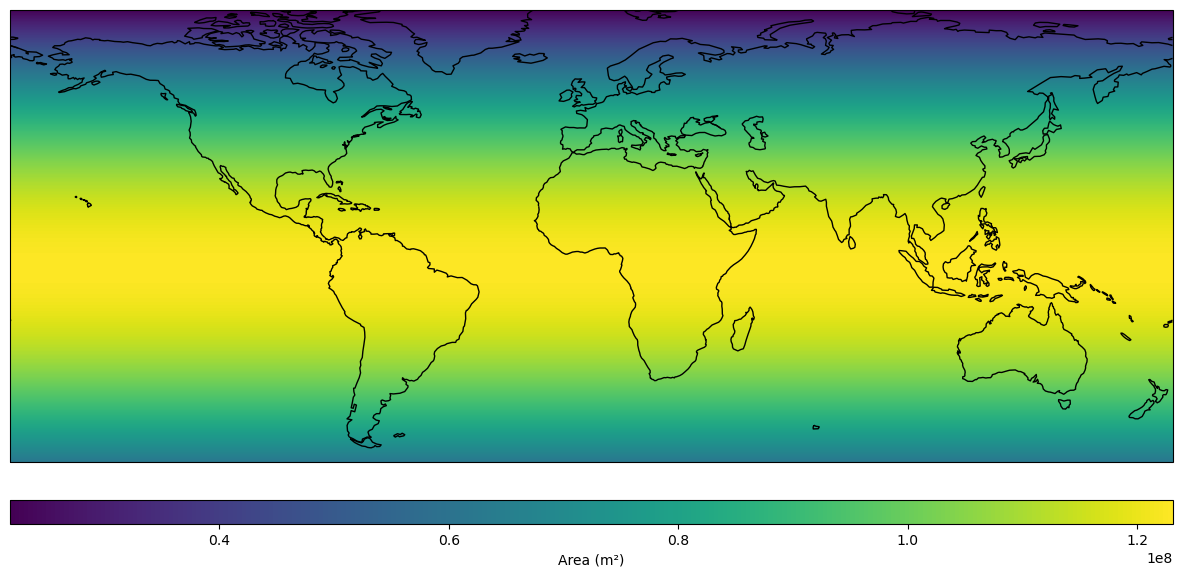

In [1]:
import numpy as np
from pyproj import CRS, Transformer
from tqdm import tqdm

# 计算各个纬度上的格网面积
latitudes = np.arange(-60, 80, 0.1)  # 从-90度到90度，步长为0.1度
longitudes = np.arange(-180, 180, 0.1)  # 从-180度到180度，步长为0.1度

areas = np.empty((latitudes.size, longitudes.size))

# 创建一个投影转换器
transformer = Transformer.from_crs(CRS.from_epsg(4326), CRS.from_epsg(6933), always_xy=True)

# 创建一个带有进度条的循环
for i in tqdm(range(len(latitudes)), desc="Processing", ncols=70):
    lat = latitudes[i]
    for j in range(len(longitudes)):
        lon = longitudes[j]
        
        # 坐标转换并计算面积
        x1, y1 = transformer.transform(lon, lat)
        x2, y2 = transformer.transform(lon+0.1, lat)
        x3, y3 = transformer.transform(lon+0.1, lat+0.1)
        x4, y4 = transformer.transform(lon, lat+0.1)
        
        # 计算面积
        area = 0.5 * abs((x1*y2 + x2*y3 + x3*y4 + x4*y1) - (y1*x2 + y2*x3 + y3*x4 + y4*x1))
        areas[i, j] = area

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 用cartopy创建地图
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 添加海洋
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')

# 添加海岸线
ax.coastlines()

# 绘制面积数据
img = ax.imshow(areas, extent=[-180, 180, -60, 80], transform=ccrs.PlateCarree(), cmap='viridis', origin='lower')

# 添加颜色条
cbar = plt.colorbar(img, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Area (m²)')

# 显示地图
plt.show()
AREAS = areas/10000000

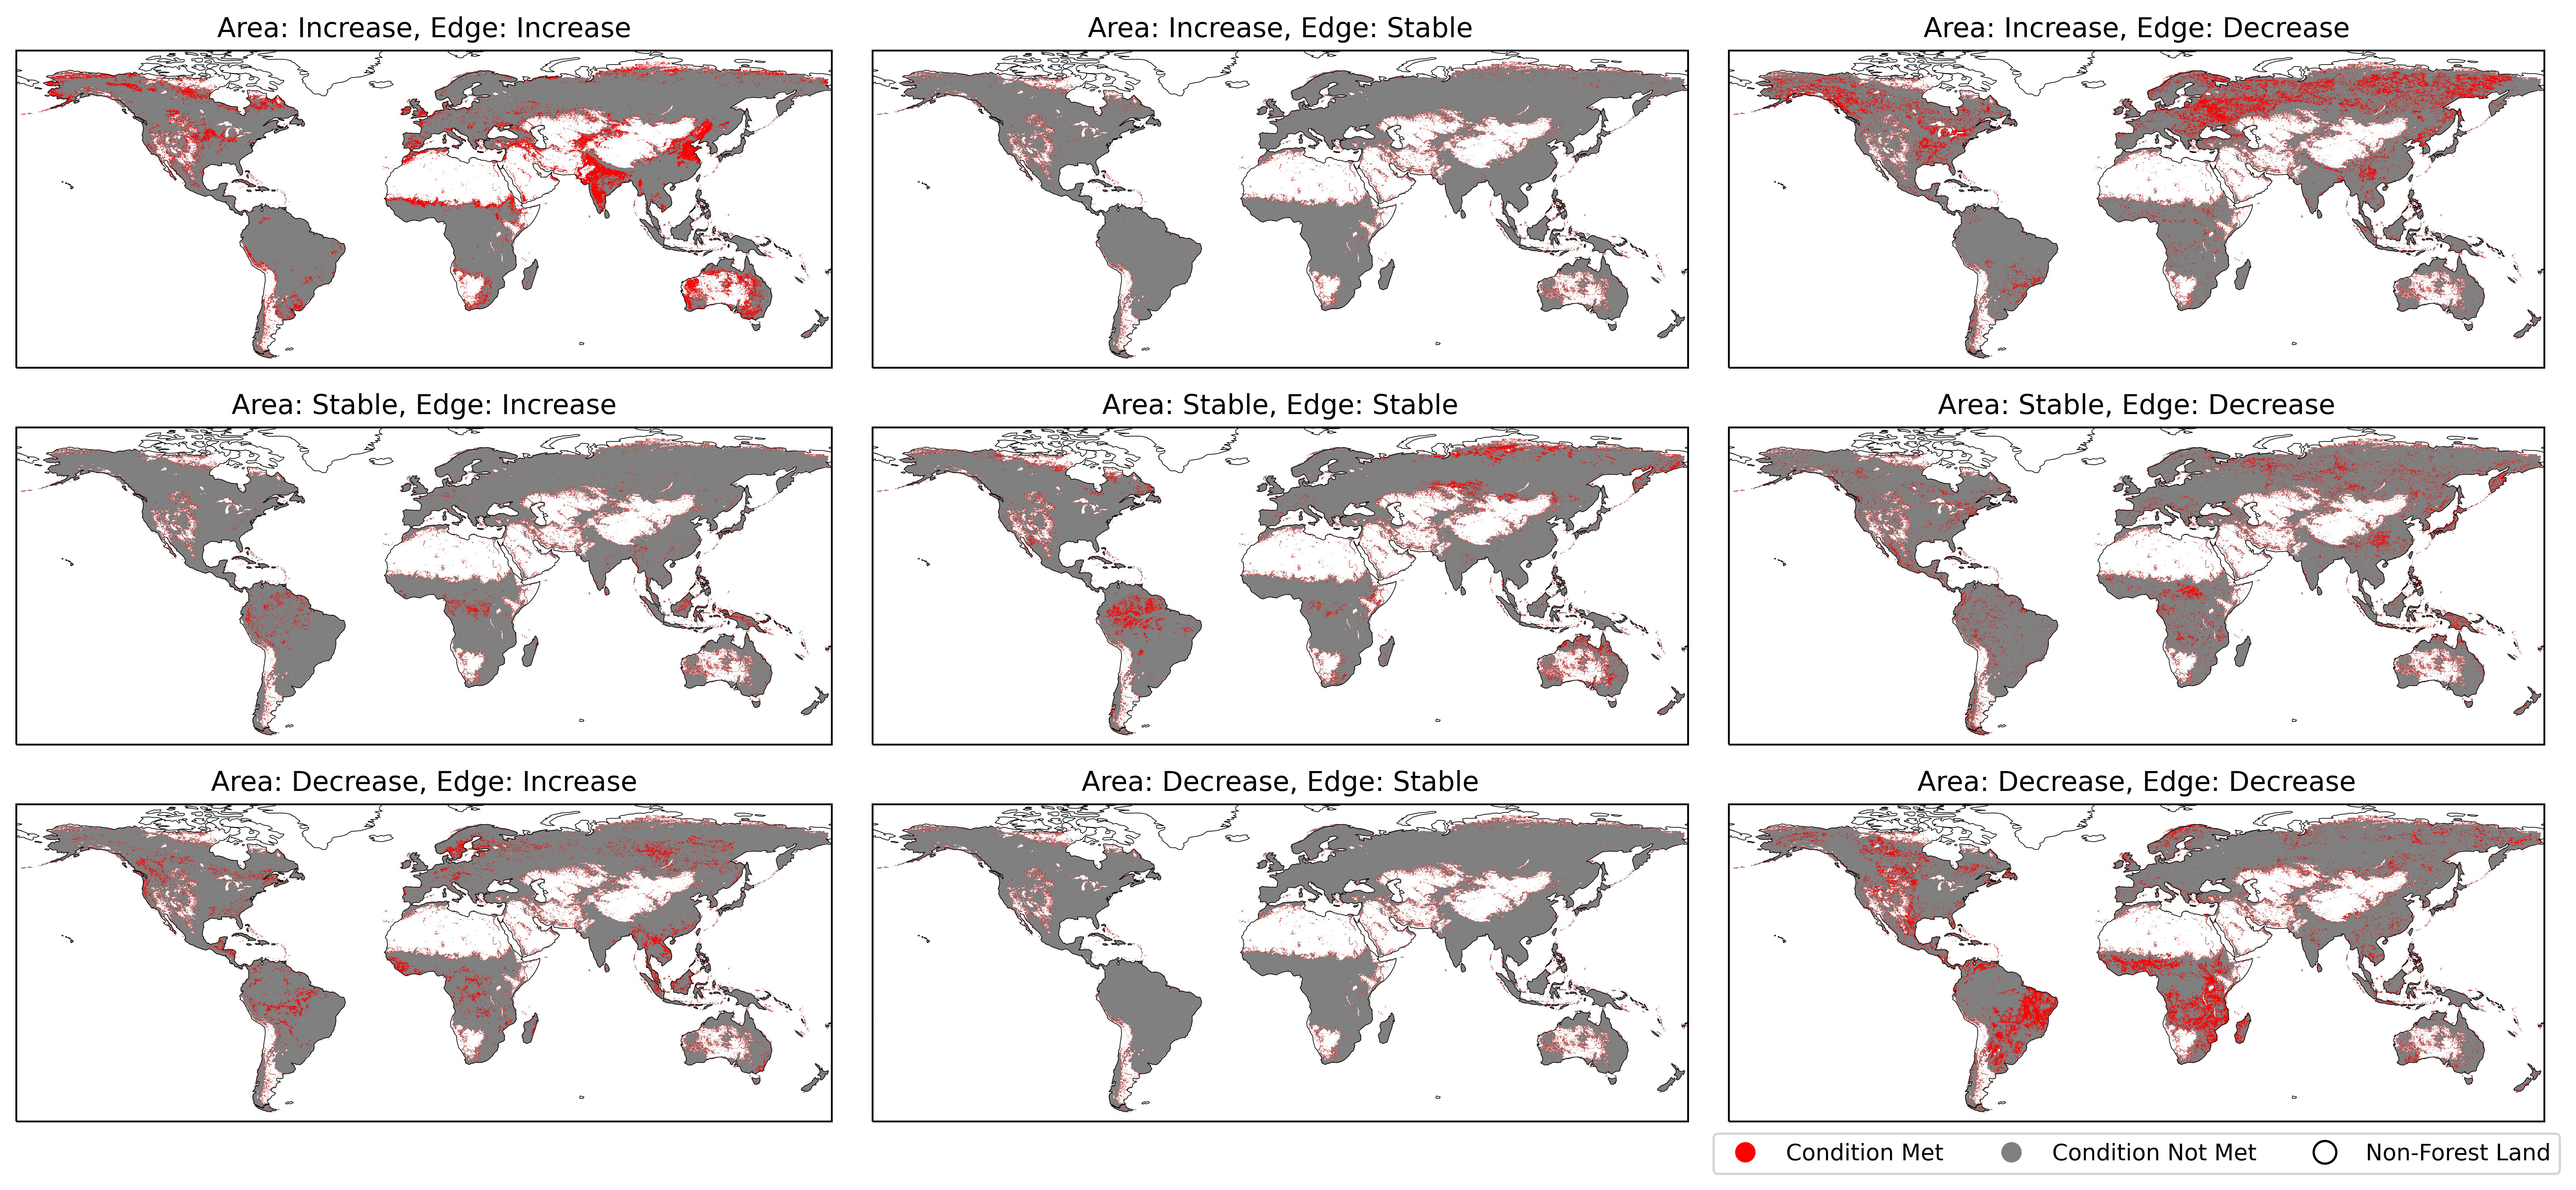

In [71]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# 读取tif文件
def read_tif(file):
    with rasterio.open(file) as src:
        return src.read(1)

# 设置文件路径
base_dir = r"H:\Global_tree_cover\TIFoutput\01\whole map"

area_2000 = read_tif(base_dir + "\\2000Area.tif")
area_2020 = read_tif(base_dir + "\\2020Area.tif")
edge_2000 = read_tif(base_dir + "\\2000Edge.tif")
edge_2020 = read_tif(base_dir + "\\2020Edge.tif")

area_2000 = np.where(area_2000 >= 0, area_2000, 0)
area_2020 = np.where(area_2020 >= 0, area_2020, 0)
edge_2000 = np.where(edge_2000 >= 0, edge_2000, 0)
edge_2020 = np.where(edge_2020 >= 0, edge_2020, 0)

# 计算变化
area_diff = area_2020 - area_2000
edge_diff = edge_2020 - edge_2000

# 定义条件
thresh = 0.01  # 可以调整此阈值以控制"变化不大"的含义
cond_area_inc = area_diff > thresh*area_2000  # area增加
cond_area_dec = area_diff < -thresh*area_2000  # area减少
cond_area_stable = np.abs(area_diff) <= thresh*area_2000  # area变化不大
cond_edge_inc = edge_diff > thresh*edge_2000  # edge增加
cond_edge_dec = edge_diff < -thresh*edge_2000  # edge减少
cond_edge_stable = np.abs(edge_diff) <= thresh*edge_2000  # edge变化不大

forest_mask = np.where(np.logical_or(area_2000 > 0, area_2020 > 0), 1, np.nan)
non_forest_mask = np.where(np.isnan(forest_mask), 2, 0)

results = []
titles = []
# 九种情况
for cond_area in [cond_area_inc, cond_area_stable, cond_area_dec]:
    for cond_edge in [cond_edge_inc, cond_edge_stable, cond_edge_dec]:
        result = np.where(np.logical_and(cond_area, cond_edge), 1, 0)
        result = result * forest_mask
        result = np.nan_to_num(result) + non_forest_mask
        results.append(result)
        titles.append("Area: {}, Edge: {}".format(
            "Increase" if cond_area is cond_area_inc else ("Stable" if cond_area is cond_area_stable else "Decrease"),
            "Increase" if cond_edge is cond_edge_inc else ("Stable" if cond_edge is cond_edge_stable else "Decrease")))

# 设置投影
projection = ccrs.PlateCarree()

# 创建一个colormap
cmap = LinearSegmentedColormap.from_list(
    "my_colormap", ["gray", "red", "White"], N=3
)


fig, axs = plt.subplots(3, 3, figsize=(20, 9), subplot_kw={'projection': projection},dpi=100)

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.0, wspace=0.05)

# 自定义颜色标记
red_patch = mpatches.Patch(facecolor='red', edgecolor='none',
                  label='Condition Met')
gray_patch = mpatches.Patch(facecolor='gray', edgecolor='none',
                   label='Condition Not Met')
tan_patch = mpatches.Patch(facecolor='white', edgecolor='none',
                  label='Non-Forest Land')

legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Condition Met',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', 
                          label='Condition Not Met',
                          markerfacecolor='gray', markersize=10),
                   Line2D([0], [0], marker='o', color='w', 
                          label='Non-Forest Land',
                          markerfacecolor='white', markeredgecolor='black', markersize=10)]

# 绘制图像
for ax, result, title in zip(axs.ravel(), results, titles):
    img = ax.imshow(result, cmap=cmap, transform=ccrs.PlateCarree(), extent=[-180, 180, -60, 80])  # 假设数据的范围是全球
    ax.add_feature(cfeature.COASTLINE, edgecolor='black',linewidth=0.3)  # 添加黑色海岸线以便于观察
    ax.set_title(title)

# 添加颜色标记说明
plt.legend(handles=legend_elements, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.2), 
           ncol=3, 
           fancybox=True)

plt.show()

In [72]:
import geopandas as gpd
import rasterio
import numpy as np
from rasterio.features import geometry_mask

# 读取国家边界数据
countries = gpd.read_file(r'H:\Global_tree_cover\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp')

# 初始化列
for cond in ['Increase', 'Stable', 'Decrease']:
    for measure in ['Area2000', 'Area2020', 'Edge2000', 'Edge2020', 'AreaDiff', 'EdgeDiff']:
        countries[measure + '_' + cond] = 0

# 遍历所有的结果（栅格数据）
for result, title in zip(results, titles):
    cond_area, cond_edge = title.split(', ')

    # 对于每一个国家
    for idx, country in countries.iterrows():
        # 创建一个 mask，该 mask 只覆盖当前国家
        mask = geometry_mask([country.geometry], 
                         transform=rasterio.transform.from_origin(-180, 90, 360/result.shape[1], 180/result.shape[0]), 
                         invert=True, 
                         out_shape=result.shape)

        # 使用 mask 提取当前国家的栅格数据
        country_data = np.where((mask == True) & (result == 1), True, False)

        # 计算满足条件的栅格数值
        Area2020 = np.sum(area_2020[country_data].astype(np.float64)/(1000*1000))
        Area2000 = np.sum(area_2000[country_data].astype(np.float64)/(1000*1000))
        Edge2020 = np.sum(edge_2020[country_data].astype(np.float64)/(1000))
        Edge2000 = np.sum(edge_2000[country_data].astype(np.float64)/(1000))
        AreaDiff = np.sum(area_diff[country_data].astype(np.float64)/(1000*1000))
        EdgeDiff = np.sum(edge_diff[country_data].astype(np.float64)/(1000))
        TOTALAREA = np.sum(areas[country_data].astype(np.float64)/(1000*1000))

        """
        Area2020 = sum(int(value) for value in area_2020[mask].ravel())//(1000*1000)
        Area2000 = sum(int(value) for value in area_2000[mask].ravel())//(1000*1000)
        Edge2020 = sum(int(value) for value in edge_2020[mask].ravel())//(1000)
        Edge2000 = sum(int(value) for value in edge_2000[mask].ravel())//(1000)
        AreaDiff = sum(int(value) for value in area_diff[mask].ravel())//(1000*1000)
        EdgeDiff = sum(int(value) for value in edge_diff[mask].ravel())//(1000)
        """   
        
        countries.loc[idx, f'{title}_Area2020'] = (Area2020)
        countries.loc[idx, f'{title}_Area2000'] = (Area2000)
        countries.loc[idx, f'{title}_Edge2020'] = (Edge2020)
        countries.loc[idx, f'{title}_Edge2000'] = (Edge2000)
        countries.loc[idx, f'{title}_AreaDiff'] = (AreaDiff)
        countries.loc[idx, f'{title}_EdgeDiff'] = (EdgeDiff)
        countries.loc[idx, f'{title} AREA'] = (TOTALAREA)
        
# 打印结果
print(countries)



          featurecla  scalerank  LABELRANK                    SOVEREIGNT  \
0    Admin-0 country          0          2                     Indonesia   
1    Admin-0 country          0          3                      Malaysia   
2    Admin-0 country          0          2                         Chile   
3    Admin-0 country          0          3                       Bolivia   
4    Admin-0 country          0          2                          Peru   
..               ...        ...        ...                           ...   
253  Admin-0 country          0          4                         China   
254  Admin-0 country          6          5                     Australia   
255  Admin-0 country          6          8  Bajo Nuevo Bank (Petrel Is.)   
256  Admin-0 country          6          5               Serranilla Bank   
257  Admin-0 country          6          6              Scarborough Reef   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      IDN         0      2  Sove

In [70]:
country_data==1

array([2., 2., 2., ..., 2., 2., 2.])

In [73]:
# 删除geometry列
countries_no_geometry = countries.drop('geometry', axis=1)

# 保存为CSV
countries_no_geometry.to_csv(r'H:\Global_tree_cover\country_change_results_new.csv')


In [127]:
top_countries = ['Russia', 'Canada', 'Brazil', 'United States of America', 'China', 'Australia', 'Dem. Rep. Congo', 'Argentina', 'Angola', 'Bolivia', 'Peru', 'South Africa', 'Zambia', 'Namibia', 'Myanmar', 'Paraguay', 'Thailand', 'India', 'Botswana']
top_countries_indices = countries[countries['NAME'].isin(top_countries)].index
top_20_countries = countries.loc[top_countries_indices]
area_diff = top_20_countries['Area: Increase, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_AreaDiff']

edge_diff = top_20_countries['Area: Increase, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_EdgeDiff']

Forest_area = top_20_countries['Area: Increase, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2020']

population = top_20_countries['POP_EST']
gdp = top_20_countries['GDP_MD']

In [128]:
Forest_area

3      8.307706e+05
4      7.068015e+05
5      1.059354e+06
8      2.253671e+05
9      1.223443e+06
31     1.104059e+06
35     3.280858e+05
36     5.758033e+05
44     2.705200e+06
47     7.020767e+06
80     4.129601e+05
101    8.320342e+05
106    2.221708e+05
110    2.752214e+05
126    3.276041e+05
138    2.859147e+05
154    1.986343e+06
155    2.773687e+06
176    1.132945e+06
dtype: float64

In [111]:
bubble_size = np.log(gdp)  # 取对数后作为气泡大小
bubble_color = np.log(population)  # 取对数后作为气泡颜色
gdp_min = np.min(countries['GDP_MD'])
gdp_max = np.max(countries['GDP_MD'])
pop_min = np.min(countries['POP_EST'])
pop_max = np.max(countries['POP_EST'])
bubble_min = np.min(bubble_size)
bubble_max = np.max(bubble_size)

print("GDP min:", gdp_min)
print("GDP max:", gdp_max)
print("Population min:", pop_min)
print("Population max:", pop_max)
print("Bubble size min:", bubble_min)
print("Bubble size max:", bubble_max)
population

GDP min: -99
GDP max: 21433226
Population min: 0.0
Population max: 1397715000.0
Bubble size min: 1.4090898685541382
Bubble size max: 1.9921238736992195


3      1.151310e+07
4      3.251045e+07
5      4.493871e+07
8      1.366418e+09
9      1.397715e+09
31     8.679057e+07
35     2.494530e+06
36     5.855827e+07
44     2.110495e+08
47     1.443735e+08
80     1.786103e+07
101    3.182530e+07
106    2.303697e+06
110    6.962558e+07
126    5.404542e+07
138    7.044636e+06
154    3.282395e+08
155    3.758926e+07
176    2.536431e+07
Name: POP_EST, dtype: float64

C:\Users\hyou34\AppData\Local\Temp\ipykernel_23384\628570941.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  log_gdp_cmap = plt.cm.get_cmap(cmap)


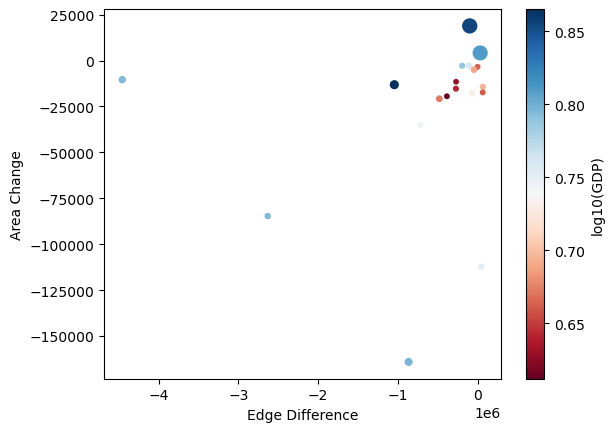

In [119]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


bubble_size = np.log(gdp)  # 取对数后作为气泡大小
bubble_color = np.log(population)  # 取对数后作为气泡颜色
gdp_min = np.min(countries['GDP_MD'])
gdp_max = np.max(countries['GDP_MD'])
pop_min = np.min(countries['POP_EST'])
pop_max = np.max(countries['POP_EST'])
bubble_min = np.min(bubble_size)
bubble_max = np.max(bubble_size)

print("GDP min:", gdp_min)
print("GDP max:", gdp_max)
print("Population min:", pop_min)
print("Population max:", pop_max)
print("Bubble size min:", bubble_min)
print("Bubble size max:", bubble_max)
population


max_bubble_size = 100
min_bubble_size = 10

# 计算对数尺度的GDP
log_gdp = np.log10(gdp)

# 定义对数尺度的颜色映射范围
log_gdp_min = log_gdp.min()
log_gdp_max = log_gdp.max()

# 创建对数尺度的颜色映射对象
cmap = 'RdBu'

log_gdp_cmap = plt.cm.get_cmap(cmap)
log_gdp_norm = plt.Normalize(vmin=log_gdp_min, vmax=log_gdp_max)

# 获取人口数据
population = top_20_countries['POP_EST']

# 对人口数据进行归一化处理
bubble_sizes = (population - population.min()) / (population.max() - population.min())

# 调整气泡大小的范围
bubble_sizes = bubble_sizes * (max_bubble_size - min_bubble_size) + min_bubble_size

# 绘制气泡图
plt.scatter(edge_diff, area_diff, s=bubble_sizes, c=log_gdp, cmap=log_gdp_cmap, norm=log_gdp_norm)

# 设置横纵坐标标签
plt.xlabel('Edge Difference')
plt.ylabel('Area Change')

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('log10(GDP)')

# 显示图像
plt.show()


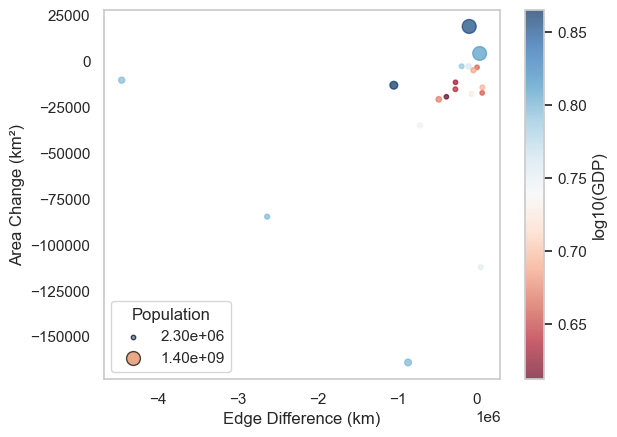

In [126]:
import seaborn as sns

# 设置Seaborn样式
sns.set(style='whitegrid')

# 创建Figure和Axes对象
fig, ax = plt.subplots()

# 绘制Scatter Plot
scatter = ax.scatter(edge_diff, area_diff, s=bubble_sizes, c=log_gdp, cmap='RdBu', alpha=0.7)

# 设置横纵坐标标签
ax.set_xlabel('Edge Difference (km)')
ax.set_ylabel('Area Change (km²)')

# 添加颜色标注
cbar = plt.colorbar(scatter, ax=ax, label='log10(GDP)')

# 添加气泡大小图例
legend_elements = [plt.scatter([], [], s=size, edgecolors='black', alpha=0.7) for size in [min_bubble_size, max_bubble_size]]
legend_labels = [f'{population.min():.2e}', f'{population.max():.2e}']
ax.legend(legend_elements, legend_labels, title='Population')

# 去掉图中的横线和竖线
ax.grid(False)

# 显示图像
plt.show()

GDP min: -99
GDP max: 21433226
Population min: 2303697.0
Population max: 1397715000.0
Bubble size min: 9.422706050118514
Bubble size max: 16.880452892751148


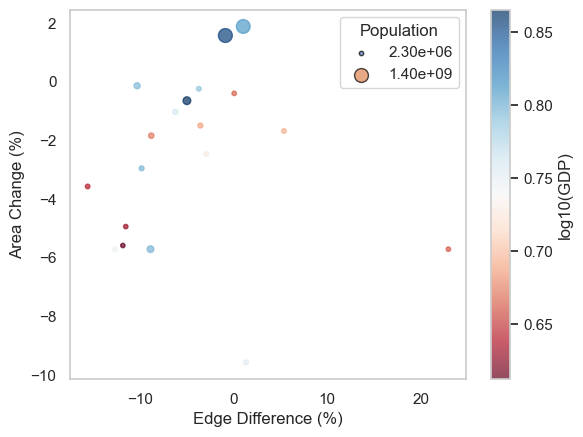

In [143]:
top_countries = ['Russia', 'Canada', 'Brazil', 'United States of America', 'China', 'Australia', 'Dem. Rep. Congo', 'Argentina', 'Angola', 'Bolivia', 'Peru', 'South Africa', 'Zambia', 'Namibia', 'Myanmar', 'Paraguay', 'Thailand', 'India', 'Botswana']
top_countries_indices = countries[countries['NAME'].isin(top_countries)].index
top_20_countries = countries.loc[top_countries_indices]
area_diff = 100*((top_20_countries['Area: Increase, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_AreaDiff'])/(top_20_countries['Area: Increase, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2000']))

edge_diff = 100*((top_20_countries['Area: Increase, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_EdgeDiff'])/(top_20_countries['Area: Increase, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Edge2000']))

Forest_area = top_20_countries['Area: Increase, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2020']

population = top_20_countries['POP_EST']
gdp = top_20_countries['GDP_MD']
             
bubble_size = np.log(gdp)  # 取对数后作为气泡大小
bubble_color = np.log(population)  # 取对数后作为气泡颜色
gdp_min = np.min(countries['GDP_MD'])
gdp_max = np.max(countries['GDP_MD'])
pop_min = np.min(population)
pop_max = np.max(population)
bubble_min = np.min(bubble_size)
bubble_max = np.max(bubble_size)

print("GDP min:", gdp_min)
print("GDP max:", gdp_max)
print("Population min:", pop_min)
print("Population max:", pop_max)
print("Bubble size min:", bubble_min)
print("Bubble size max:", bubble_max)

# 对人口数据进行归一化处理
bubble_sizes = (population - population.min()) / (population.max() - population.min())

# 调整气泡大小的范围
bubble_sizes = bubble_sizes * (max_bubble_size - min_bubble_size) + min_bubble_size


import seaborn as sns

# 设置Seaborn样式
sns.set(style='whitegrid')

# 创建Figure和Axes对象
fig, ax = plt.subplots()

# 绘制Scatter Plot
scatter = ax.scatter(edge_diff, area_diff, s=bubble_sizes, c=log_gdp, cmap='RdBu', alpha=0.7)

# 设置横纵坐标标签
ax.set_xlabel('Edge Difference (%)')
ax.set_ylabel('Area Change (%)')

# 添加颜色标注
cbar = plt.colorbar(scatter, ax=ax, label='log10(GDP)')


legend_elements = [plt.scatter([], [], s=size, edgecolors='black', alpha=0.7) for size in [min_bubble_size, max_bubble_size]]
legend_labels = [f'{population.min():.2e}', f'{population.max():.2e}']
ax.legend(legend_elements, legend_labels, title='Population')

# 去掉图中的横线和竖线
ax.grid(False)

# 显示图像
plt.show()

GDP min: -99
GDP max: 21433226
Population min: 0.0
Population max: 1397715000.0
Bubble size min: -inf
Bubble size max: 16.880452892751148


C:\Users\hyou34\AppData\Local\Temp\ipykernel_23384\1305200354.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  log_gdp_cmap = plt.cm.get_cmap(cmap)


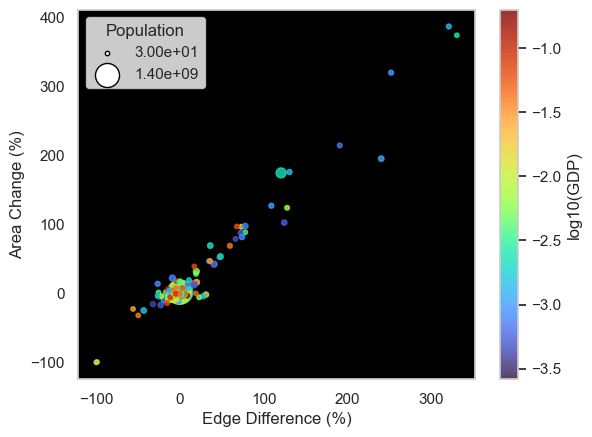

In [237]:
top_countries = countries['NAME']
top_countries_indices = countries[countries['NAME'].isin(top_countries)].index
top_20_countries = countries.loc[top_countries_indices]
area_diff = 100*((top_20_countries['Area: Increase, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_AreaDiff'])/(top_20_countries['Area: Increase, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2000']))

edge_diff = 100*((top_20_countries['Area: Increase, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_EdgeDiff'])/(top_20_countries['Area: Increase, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Edge2000']))

Forest_area = top_20_countries['Area: Increase, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2020']

population = top_20_countries['POP_EST']
gdp = top_20_countries['GDP_MD']
             

gdp_min = np.min(countries['GDP_MD'])
gdp_max = np.max(countries['GDP_MD'])
pop_min = np.min(population)
pop_max = np.max(population)
bubble_min = np.min(bubble_size)
bubble_max = np.max(bubble_size)

print("GDP min:", gdp_min)
print("GDP max:", gdp_max)
print("Population min:", pop_min)
print("Population max:", pop_max)
print("Bubble size min:", bubble_min)
print("Bubble size max:", bubble_max)

# 计算对数尺度的GDP
log_gdp = np.log10(gdp/population)

# 定义对数尺度的颜色映射范围
log_gdp_min = log_gdp.min()
log_gdp_max = log_gdp.max()

# 创建对数尺度的颜色映射对象
cmap = 'turbo'

log_gdp_cmap = plt.cm.get_cmap(cmap)
log_gdp_norm = plt.Normalize(vmin=log_gdp_min, vmax=log_gdp_max)

max_bubble_size = 300
min_bubble_size = 10

# 对人口数据进行归一化处理
bubble_sizes = (population - population.min()) / (population.max() - population.min())

# 调整气泡大小的范围
bubble_sizes = bubble_sizes * (max_bubble_size - min_bubble_size) + min_bubble_size


import seaborn as sns

# 设置Seaborn样式
sns.set(style='whitegrid')

# 创建Figure和Axes对象
fig, ax = plt.subplots()
ax.set_facecolor('black')

# 绘制Scatter Plot
scatter = ax.scatter(edge_diff, area_diff, s=bubble_sizes, c=log_gdp, cmap=cmap, alpha=0.8)

# 设置横纵坐标标签
ax.set_xlabel('Edge Difference (%)')
ax.set_ylabel('Area Change (%)')

# 添加颜色标注
cbar = plt.colorbar(scatter, ax=ax, label='log10(GDP)')

# 根据气泡大小排序
sorted_sizes = np.sort(bubble_sizes)
min_bubble_size = sorted_sizes[1]
max_bubble_size = sorted_sizes[-1]

# 获取气泡大小对应的人口值
second_min_bubble_population = population[bubble_sizes.argsort()[10]]
max_bubble_population = population[np.argmax(bubble_sizes)]

# 创建图例元素
legend_elements = [
    plt.scatter([], [], s=size, edgecolors='black', alpha=1, facecolors='white') 
    for size in [bubble_sizes[bubble_sizes.argsort()[10]], max_bubble_size]
]

# 创建图例标签
legend_labels = [
    f'{second_min_bubble_population:.2e}', f'{max_bubble_population:.2e}'
]

# 添加图例
ax.legend(legend_elements, legend_labels, title='Population')



# 去掉图中的横线和竖线
ax.grid(False)

# 显示图像
plt.show()

GDP min: -99
GDP max: 21433226
Population min: 0.0
Population max: 1397715000.0


C:\Users\hyou34\AppData\Local\Temp\ipykernel_23384\3591330565.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  log_gdp_cmap = plt.cm.get_cmap(cmap)


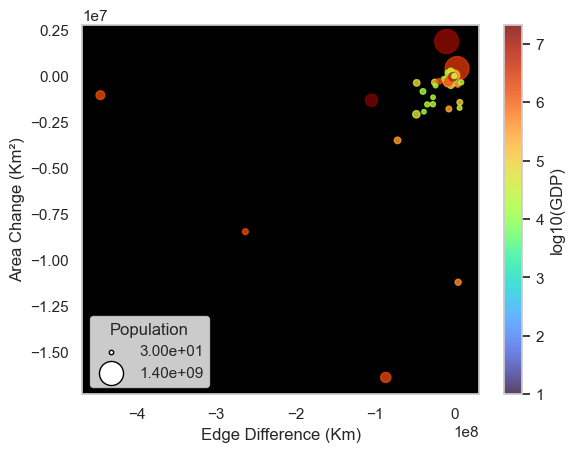

In [240]:
top_countries = countries['NAME']
top_countries_indices = countries[countries['NAME'].isin(top_countries)].index
top_20_countries = countries.loc[top_countries_indices]
area_diff = 100*((top_20_countries['Area: Increase, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_AreaDiff']))

edge_diff = 100*((top_20_countries['Area: Increase, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_EdgeDiff']))

Forest_area = top_20_countries['Area: Increase, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2020']

population = top_20_countries['POP_EST']
gdp = top_20_countries['GDP_MD']
             

gdp_min = np.min(countries['GDP_MD'])
gdp_max = np.max(countries['GDP_MD'])
pop_min = np.min(population)
pop_max = np.max(population)


print("GDP min:", gdp_min)
print("GDP max:", gdp_max)
print("Population min:", pop_min)
print("Population max:", pop_max)


# 计算对数尺度的GDP
log_gdp = np.log10(gdp)

# 定义对数尺度的颜色映射范围
log_gdp_min = log_gdp.min()
log_gdp_max = log_gdp.max()

# 创建对数尺度的颜色映射对象
cmap = 'turbo'

log_gdp_cmap = plt.cm.get_cmap(cmap)
log_gdp_norm = plt.Normalize(vmin=log_gdp_min, vmax=log_gdp_max)

max_bubble_size = 300
min_bubble_size = 10

# 对人口数据进行归一化处理
bubble_sizes = (population - population.min()) / (population.max() - population.min())

# 调整气泡大小的范围
bubble_sizes = bubble_sizes * (max_bubble_size - min_bubble_size) + min_bubble_size


import seaborn as sns

# 设置Seaborn样式
sns.set(style='whitegrid')

# 创建Figure和Axes对象
fig, ax = plt.subplots()
ax.set_facecolor('black')

# 绘制Scatter Plot
scatter = ax.scatter(edge_diff, area_diff, s=bubble_sizes, c=log_gdp, cmap=cmap, alpha=0.8)

# 设置横纵坐标标签
ax.set_xlabel('Edge Difference (Km)')
ax.set_ylabel('Area Change (Km²)')

# 添加颜色标注
cbar = plt.colorbar(scatter, ax=ax, label='log10(GDP)')

# 根据气泡大小排序
sorted_sizes = np.sort(bubble_sizes)
min_bubble_size = sorted_sizes[1]
max_bubble_size = sorted_sizes[-1]

# 获取气泡大小对应的人口值
second_min_bubble_population = population[bubble_sizes.argsort()[10]]
max_bubble_population = population[np.argmax(bubble_sizes)]

# 创建图例元素
legend_elements = [
    plt.scatter([], [], s=size, edgecolors='black', alpha=1, facecolors='white') 
    for size in [bubble_sizes[bubble_sizes.argsort()[10]], max_bubble_size]
]

# 创建图例标签
legend_labels = [
    f'{second_min_bubble_population:.2e}', f'{max_bubble_population:.2e}'
]

# 添加图例
ax.legend(legend_elements, legend_labels, title='Population')



# 去掉图中的横线和竖线
ax.grid(False)

# 显示图像
plt.show()

GDP min: 0
GDP max: 21433226
Population min: 0.0
Population max: 1397715000.0


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hyou34\AppData\Local\Temp\ipykernel_23384\3186382865.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  log_gdp_cmap = plt.cm.get_cmap(cmap)


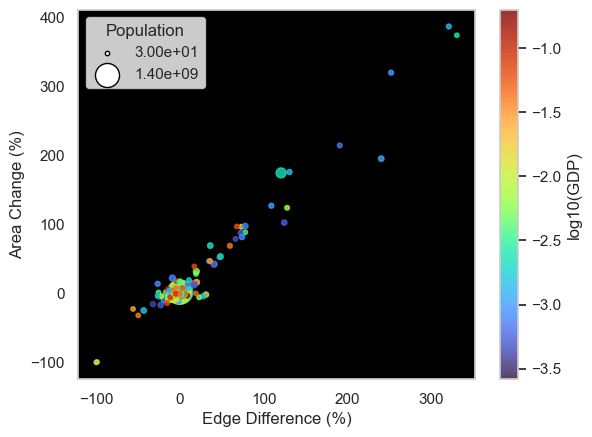

In [264]:
top_countries = countries['NAME']
top_countries_indices = countries[countries['NAME'].isin(top_countries)].index
top_countries_loc = countries.loc[top_countries_indices]
area_diff = 100*((top_countries_loc['Area: Increase, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_AreaDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_AreaDiff'])/(top_20_countries['Area: Increase, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2000']))

edge_diff = 100*((top_countries_loc['Area: Increase, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Increase, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Stable, Edge: Decrease_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Increase_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Stable_EdgeDiff'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_EdgeDiff'])/(top_20_countries['Area: Increase, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Edge2000']))

Forest_area2020 = top_countries_loc['Area: Increase, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2020'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2020']

Forest_area2000 = top_countries_loc['Area: Increase, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Area2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Area2000']

Forest_edge2020 = top_20_countries['Area: Increase, Edge: Increase_Edge2020'] + \
            top_20_countries['Area: Increase, Edge: Stable_Edge2020'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Edge2020'] + \
            top_20_countries['Area: Stable, Edge: Increase_Edge2020'] + \
            top_20_countries['Area: Stable, Edge: Stable_Edge2020'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Edge2020'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Edge2020'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Edge2020'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Edge2020']
Forest_edge2000 = top_countries_loc['Area: Increase, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Increase, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Stable, Edge: Decrease_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Increase_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Stable_Edge2000'] + \
            top_20_countries['Area: Decrease, Edge: Decrease_Edge2000']

population = top_countries_loc['POP_EST']
gdp = top_countries_loc['GDP_MD']
             
gdp = np.where(gdp>0,gdp,0)

gdp_min = np.min(gdp)
gdp_max = np.max(gdp)
pop_min = np.min(population)
pop_max = np.max(population)

print("GDP min:", gdp_min)
print("GDP max:", gdp_max)
print("Population min:", pop_min)
print("Population max:", pop_max)

# 计算对数尺度的GDP
log_gdp = np.log10(gdp/population)

# 定义对数尺度的颜色映射范围
log_gdp_min = log_gdp.min()
log_gdp_max = log_gdp.max()

# 创建对数尺度的颜色映射对象
cmap = 'turbo'

log_gdp_cmap = plt.cm.get_cmap(cmap)
log_gdp_norm = plt.Normalize(vmin=log_gdp_min, vmax=log_gdp_max)

max_bubble_size = 300
min_bubble_size = 10

# 对人口数据进行归一化处理
bubble_sizes = (population - population.min()) / (population.max() - population.min())

# 调整气泡大小的范围
bubble_sizes = bubble_sizes * (max_bubble_size - min_bubble_size) + min_bubble_size


import seaborn as sns

# 设置Seaborn样式
sns.set(style='whitegrid')

# 创建Figure和Axes对象
fig, ax = plt.subplots()
ax.set_facecolor('black')

# 绘制Scatter Plot
scatter = ax.scatter(edge_diff, area_diff, s=bubble_sizes, c=log_gdp, cmap=cmap, alpha=0.8)

# 设置横纵坐标标签
ax.set_xlabel('Edge Difference (%)')
ax.set_ylabel('Area Change (%)')

# 添加颜色标注
cbar = plt.colorbar(scatter, ax=ax, label='log10(GDP)')

# 根据气泡大小排序
sorted_sizes = np.sort(bubble_sizes)
min_bubble_size = sorted_sizes[1]
max_bubble_size = sorted_sizes[-1]

# 获取气泡大小对应的人口值
second_min_bubble_population = population[bubble_sizes.argsort()[10]]
max_bubble_population = population[np.argmax(bubble_sizes)]

# 创建图例元素
legend_elements = [
    plt.scatter([], [], s=size, edgecolors='black', alpha=1, facecolors='white') 
    for size in [bubble_sizes[bubble_sizes.argsort()[10]], max_bubble_size]
]

# 创建图例标签
legend_labels = [
    f'{second_min_bubble_population:.2e}', f'{max_bubble_population:.2e}'
]

# 添加图例
ax.legend(legend_elements, legend_labels, title='Population')



# 去掉图中的横线和竖线
ax.grid(False)

# 显示图像
plt.show()

In [263]:
import statsmodels.api as sm

# 建立模型
# Removing rows with NaN or infinite values in 'edge_diff' and 'area_diff'
clean_edge_diff = edge_diff.replace([np.inf, -np.inf], np.nan).dropna()
clean_area_diff = area_diff.replace([np.inf, -np.inf], np.nan).dropna()

# Ensuring that both series now have the same index
common_index = clean_edge_diff.index.intersection(clean_area_diff.index)
clean_edge_diff = clean_edge_diff.loc[common_index]
clean_area_diff = clean_area_diff.loc[common_index]

# Running OLS regression
model = sm.OLS(clean_area_diff, sm.add_constant(clean_edge_diff))
results = model.fit()


# 拟合模型
results = model.fit()

# 输出模型摘要
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          4.83e-183
Time:                        11:32:34   Log-Likelihood:                -755.44
No. Observations:                 172   AIC:                             1515.
Df Residuals:                     170   BIC:                             1521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1966      1.514      2.111      0.0

In [403]:
import pandas as pd
# Calculate the difference between 2020 and 2000 for forest area and forest edge
Forest_area_diff = 100*(Forest_area2020 - Forest_area2000)/Forest_area2000
Forest_edge_diff = 100*(Forest_edge2020 - Forest_edge2000)/Forest_edge2000
Rate = Forest_area_diff/Forest_edge_diff
# Create a DataFrame with the differences
df_diff = pd.DataFrame({'Forest_area_diff': Forest_area_diff, 'Forest_edge_diff': Forest_edge_diff , 'Forest_area_edge_diff_rate': Rate})



import pandas as pd

data = {
    'Country': countries['ADMIN'],
    'Forest_area2000': Forest_area2000,
    'Forest_area2020': Forest_area2020,
    'Forest_edge2000': Forest_edge2000,
    'Forest_edge2020': Forest_edge2020
}

df = pd.DataFrame(data)

df['Forest_area_diff'] = 100*(df['Forest_area2020'] - df['Forest_area2000'])/df['Forest_area2000']
df['Forest_edge_diff'] = 100*(df['Forest_edge2020'] - df['Forest_edge2000'])/df['Forest_edge2000']
df['Forest_area_edge_diff_rate'] = (df['Forest_edge_diff']/df['Forest_area_diff'])
# 计算 FFI_change
df['FFI_change'] = ((df['Forest_edge2020']**2 / df['Forest_area2020']) - (df['Forest_edge2000']**2 / df['Forest_area2000']))
df['Forest_area_ave'] = (df['Forest_area2020'] + df['Forest_area2000']/2)
df['Forest_edge_ave'] = (df['Forest_edge2020'] - df['Forest_edge2000']/2)

# 对 FFI_change 取对数并保留符号
df['FFI_change_log'] = np.sign(df['FFI_change']) * np.log(np.abs(df['FFI_change']))
print(df)


                          Country  Forest_area2000  Forest_area2020  \
0                       Indonesia     65368.765162     63668.414409   
1                        Malaysia     40151.164978     36573.271930   
2                           Chile    226255.905444    222133.935855   
3                         Bolivia    834177.544027    830770.594147   
4                            Peru    724726.651391    706801.531759   
..                            ...              ...              ...   
253                   Macao S.A.R         0.000000         0.000000   
254   Ashmore and Cartier Islands         0.000000         0.000000   
255  Bajo Nuevo Bank (Petrel Is.)         0.000000         0.000000   
256               Serranilla Bank         0.000000         0.000000   
257              Scarborough Reef         0.000000         0.000000   

     Forest_edge2000  Forest_edge2020  Forest_area_diff  Forest_edge_diff  \
0       2.837517e+05     2.795486e+05         -2.601167         -1.481

In [367]:
np.nanmin(np.log10(df['FFI_change']))

-14.111104867566041

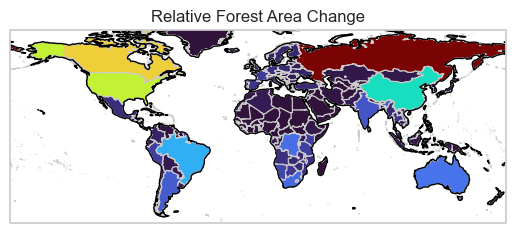

In [404]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as colors

# 读取shapefile文件
shapefile_path = r'H:\Global_tree_cover\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp'
shapefile = gpd.read_file(shapefile_path)

# 合并shapefile和相对变化量数据
merged_data = shapefile.merge(df, left_on='ADMIN', right_on='Country', how='left')


import matplotlib.colors as colors

# 调整gamma值
power_norm = colors.PowerNorm(gamma=1)

# 绘制森林面积相对变化量地图
fig, ax1 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
merged_data.plot(column='Forest_edge_ave', cmap='turbo', linewidth=0.8, ax=ax1, edgecolor='0.8', norm=power_norm)
ax1.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())

# 添加海岸线
ax1.add_feature(cartopy.feature.COASTLINE)

# 设置图标题
ax1.set_title('Relative Forest Area Change')

# 显示图表
plt.show()

C:\Users\hyou34\AppData\Local\Temp\ipykernel_23384\360145900.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


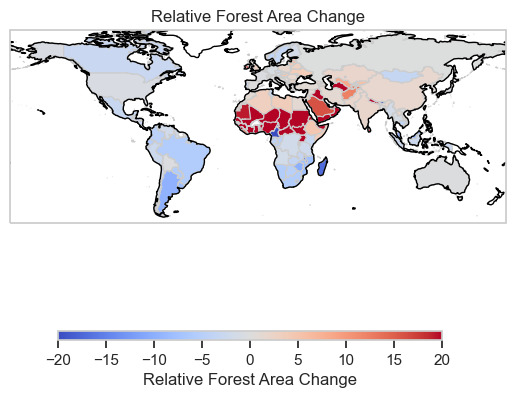

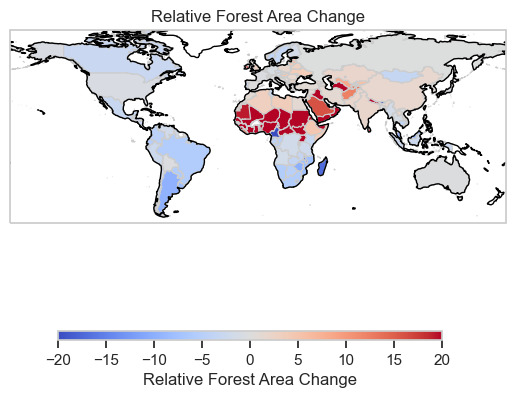

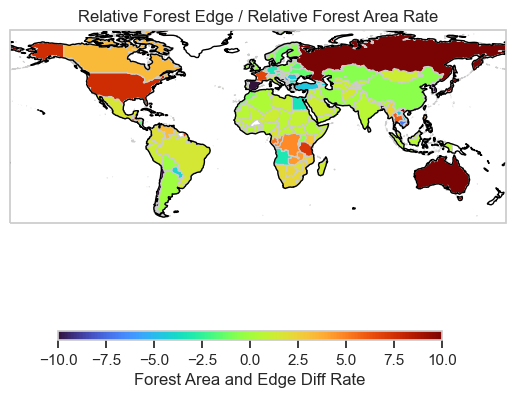

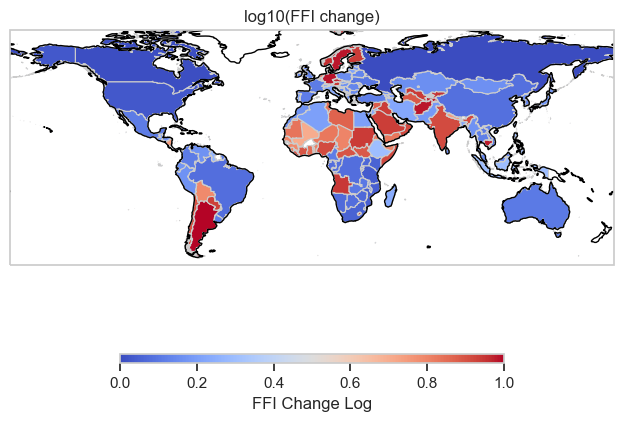

In [410]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as colors

# 读取shapefile文件
shapefile_path = r'H:\Global_tree_cover\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp'
shapefile = gpd.read_file(shapefile_path)

# 合并shapefile和相对变化量数据
merged_data = shapefile.merge(df, left_on='ADMIN', right_on='Country', how='left')

# 调整gamma值
power_norm = colors.PowerNorm(gamma=1, vmin=-20, vmax=20)

# 绘制森林面积相对变化量地图
fig, ax1 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
merged_data.plot(column='Forest_area_diff', cmap='coolwarm', linewidth=0.8, ax=ax1, edgecolor='0.8', norm=power_norm)
ax1.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.set_title('Relative Forest Area Change')
cax1 = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Adjust the y-position and height of the colorbar
norm1 = colors.Normalize(vmin=-20, vmax=20)
cbar1 = ColorbarBase(cax1, cmap='coolwarm', norm=norm1, orientation='horizontal')
cbar1.set_label('Relative Forest Area Change')

# 绘制森林面积相对变化量地图
fig, ax2 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
merged_data.plot(column='Forest_area_diff', cmap='coolwarm', linewidth=0.8, ax=ax2, edgecolor='0.8', norm=power_norm)
ax2.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.COASTLINE)
ax2.set_title('Relative Forest Area Change')
cax2 = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Adjust the y-position and height of the colorbar
norm2 = colors.Normalize(vmin=-20, vmax=20)
cbar2 = ColorbarBase(cax2, cmap='coolwarm', norm=norm2, orientation='horizontal')
cbar2.set_label('Relative Forest Area Change')

# 绘制森林面积相对变化量地图
fig, ax3 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
merged_data.plot(column='Forest_area_edge_diff_rate', cmap='turbo', linewidth=0.8, ax=ax3, edgecolor='0.8', vmin=-10, vmax=10)
ax3.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.COASTLINE)
ax3.set_title('Relative Forest Edge / Relative Forest Area Rate')
cax3 = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Adjust the y-position and height of the colorbar
norm3 = colors.Normalize(vmin=-10, vmax=10)
cbar3 = ColorbarBase(cax3, cmap='turbo', norm=norm3, orientation='horizontal')
cbar3.set_label('Forest Area and Edge Diff Rate')

# 绘制森林面积相对变化量地图
fig, ax4 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
merged_data.plot(column='FFI_change_log', cmap='coolwarm', linewidth=0.8, ax=ax4, edgecolor='0.8')
ax4.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.COASTLINE)
ax4.set_title('log10(FFI change)')
cax4 = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Adjust the y-position and height of the colorbar
cbar4 = ColorbarBase(cax4, cmap='coolwarm', orientation='horizontal')
cbar4.set_label('FFI Change Log')

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()


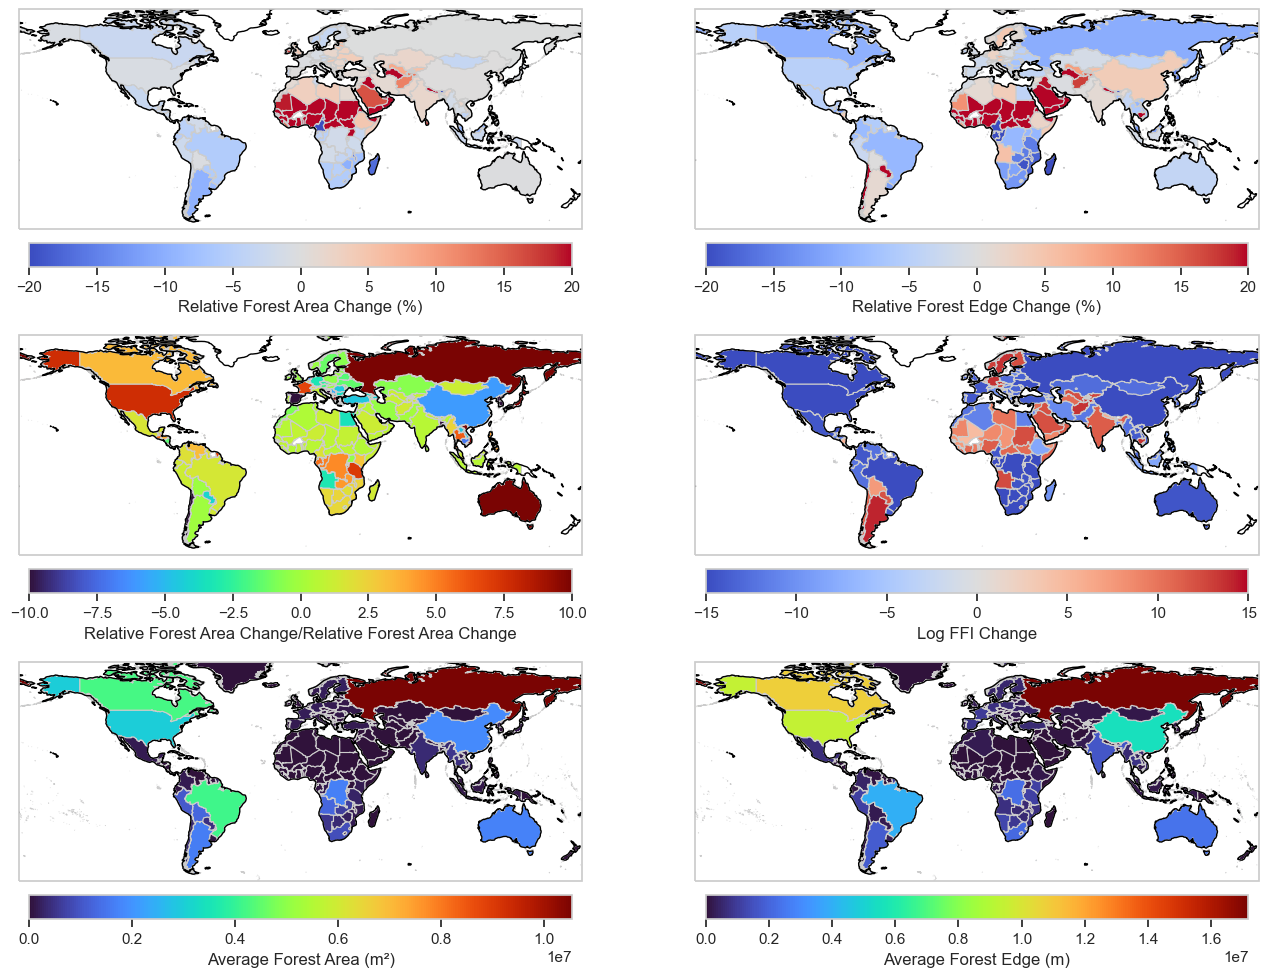

In [428]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as colors

# 读取shapefile文件
shapefile_path = r'H:\Global_tree_cover\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp'
shapefile = gpd.read_file(shapefile_path)

# 合并shapefile和相对变化量数据
merged_data = shapefile.merge(df, left_on='ADMIN', right_on='Country', how='left')

# 合并shapefile和相对变化量数据
merged_data = shapefile.merge(df, left_on='ADMIN', right_on='Country', how='left')

# 将Taiwan、Hong Kong和Macao的数据加到China中
taiwan_data = merged_data.loc[merged_data['ADMIN'] == 'Taiwan'].fillna(0)
hongkong_data = merged_data.loc[merged_data['ADMIN'] == 'Hong Kong S.A.R.'].fillna(0)
macao_data = merged_data.loc[merged_data['ADMIN'] == 'Macao S.A.R'].fillna(0)

merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_diff'] += taiwan_data['Forest_area_diff'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_diff'] += hongkong_data['Forest_area_diff'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_diff'] += macao_data['Forest_area_diff'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_edge_diff'] += taiwan_data['Forest_edge_diff'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_edge_diff'] += hongkong_data['Forest_edge_diff'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_edge_diff'] += macao_data['Forest_edge_diff'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_edge_diff_rate'] += taiwan_data['Forest_area_edge_diff_rate'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_edge_diff_rate'] += hongkong_data['Forest_area_edge_diff_rate'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_edge_diff_rate'] += macao_data['Forest_area_edge_diff_rate'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'FFI_change_log'] += taiwan_data['FFI_change_log'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'FFI_change_log'] += hongkong_data['FFI_change_log'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'FFI_change_log'] += macao_data['FFI_change_log'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_ave'] += taiwan_data['Forest_area_ave'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_ave'] += hongkong_data['Forest_area_ave'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_area_ave'] += macao_data['Forest_area_ave'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_edge_ave'] += taiwan_data['Forest_edge_ave'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_edge_ave'] += hongkong_data['Forest_edge_ave'].values[0]
merged_data.loc[merged_data['ADMIN'] == 'China', 'Forest_edge_ave'] += macao_data['Forest_edge_ave'].values[0]

# 删除Taiwan、Hong Kong和Macao的行
merged_data = merged_data.loc[~merged_data['ADMIN'].isin(['Taiwan', 'Hong Kong', 'Macao'])]

# 创建包含四个子图的图表
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置每个子图的标题
titles = ['Relative Forest Area Change', 'Relative Forest Area Change', 'Relative Forest Edge / Relative Forest Area Rate', 'log10(FFI change)', 'Average Forest Area', 'Average Forest Edge']

# 绘制子图并添加colorbar
for i, ax in enumerate(axes.flat):
    if i == 2:
        merged_data.plot(column='Forest_area_edge_diff_rate', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=-10, vmax=10, norm=colors.Normalize(vmin=-10, vmax=10))
        cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.01, ax.get_position().width, 0.02])
        norm = colors.Normalize(vmin=-10, vmax=10)
        cbar = ColorbarBase(cax, cmap='turbo', norm=norm, orientation='horizontal')
        cbar.set_label('Relative Forest Area Change/Relative Forest Area Change')
    elif i == 3:
        merged_data.plot(column='FFI_change_log', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', norm=colors.Normalize(vmin=-15, vmax=15))
        cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.01, ax.get_position().width, 0.02])
        norm = colors.Normalize(vmin=-15, vmax=15)
        cbar = ColorbarBase(cax, cmap='coolwarm', norm=norm, orientation='horizontal')
        cbar.set_label('Log FFI Change')
    elif i == 0:
        merged_data.plot(column='Forest_area_diff', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', norm=colors.Normalize(vmin=-20, vmax=20))
        cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.01, ax.get_position().width, 0.02])
        norm = colors.Normalize(vmin=-20, vmax=20)
        cbar = ColorbarBase(cax, cmap='coolwarm', norm=norm, orientation='horizontal')
        cbar.set_label('Relative Forest Area Change (%)')
    elif i == 1:
        merged_data.plot(column='Forest_edge_diff', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', norm=colors.Normalize(vmin=-20, vmax=20))
        cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.01, ax.get_position().width, 0.02])
        norm = colors.Normalize(vmin=-20, vmax=20)
        cbar = ColorbarBase(cax, cmap='coolwarm', norm=norm, orientation='horizontal')
        cbar.set_label('Relative Forest Edge Change (%)')
    elif i == 4:
        merged_data.plot(column='Forest_area_ave', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.8',norm=colors.Normalize(vmin=0, vmax=np.max(merged_data['Forest_area_ave'])))
        cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.01, ax.get_position().width, 0.02])
        cbar = ColorbarBase(cax, cmap='turbo',  orientation='horizontal',norm=colors.Normalize(vmin=0, vmax=np.max(merged_data['Forest_area_ave'])))
        cbar.set_label('Average Forest Area (m²)')
    elif i == 5:
        merged_data.plot(column='Forest_edge_ave', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.8',norm=colors.Normalize(vmin=0, vmax=np.max(merged_data['Forest_edge_ave'])))
        cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.01, ax.get_position().width, 0.02])
        cbar = ColorbarBase(cax, cmap='turbo',  orientation='horizontal', norm=colors.Normalize(vmin=0, vmax=np.max(merged_data['Forest_edge_ave'])) )
        cbar.set_label('Average Forest Edge (m)')

    ax.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.COASTLINE)
    #ax.set_title(titles[i])

# 调整子图间距
plt.show()

In [427]:
hongkong_data

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
166  Admin-0 country          0          4      China    CH1         1      2   

        TYPE TLC             ADMIN  ... Forest_area2020  Forest_edge2000  \
166  Country   1  Hong Kong S.A.R.  ...      389.026072        892.02532   

    Forest_edge2020 Forest_area_diff  Forest_edge_diff  \
166      944.268625        -0.809726          5.856706   

    Forest_area_edge_diff_rate  FFI_change  Forest_area_ave Forest_edge_ave  \
166                  -7.232949  263.162639       585.126988      498.255965   

    FFI_change_log  
166       5.572772  

[1 rows x 181 columns]